# MI2 - 10: Self Organizing Maps
## The chantastic 4: Elisabeth Kress, Paola Suárez, Jianmeng Wu and Esra Zihni

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import euclidean_distances
%matplotlib inline

## 10.1.  1d Self-Organizing Map for 2d data

### a) Generating data points

In [2]:
d = 2
p = 1000
low = [0,0]
high = [2,1]
x = np.random.uniform(low, high, size=(p,d))

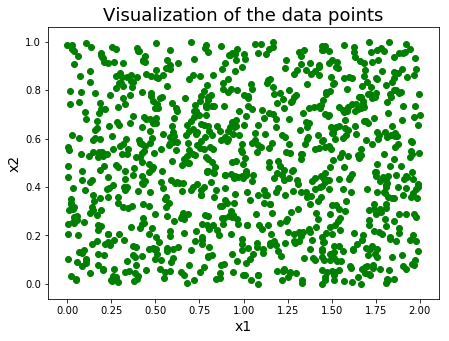

In [3]:
plt.figure(figsize= (7,5))
plt.scatter(x[:,0],x[:,1],c= 'g')
plt.title('Visualization of the data points', size=18)
plt.xlabel('x1', size=14)
plt.ylabel('x2', size=14)
plt.show()

### b) Gaussian neighbourhood function

In [89]:
# Helper functions
def h_function(q, p, sigma):
    return np.exp(-((q-p)**2)/(2*(sigma**2)))

def init_w1(x, K):
    w = np.random.normal(loc=x.mean(axis=0), size=(K,x.shape[1]))
    return w

def init_w2(x, K):
    w = np.zeros((K, x.shape[1]))
    w[:,-1] = np.random.uniform(0, 5, K)
    return w

### c) Implementing 1d self organizing map

In [85]:
def SOM(x, Ks, init_w, epsilon0=0.1, sigma0=1.5):
    dim = x.shape[1]
    t_max = len(x)
    final_ws =[]
    epsilons = np.zeros((t_max+1, len(Ks)))
    sigmas = np.copy(epsilons)
    epsilons[0,:] = epsilon0
    sigmas[0,:] = sigma0*Ks.mean()/np.log(Ks)

    for l,K in enumerate(Ks):
        w = init_w(x, K)

        for t in range(t_max):
            if t <= t_max/4: 
                epsilons[t,l] = epsilons[0,l]
                sigmas[t,l] = sigmas[0,l]
            else: 
                epsilons[t,l] = epsilons[t-1,l] * 0.99
                sigmas[t,l] = sigmas[t-1,l] * 0.99
        #while sigma > 0.1:
            p= np.argmin(euclidean_distances(x[t].reshape(1,dim), w))
            for j in range(K):
                w[j,:] += epsilons[t,l]*np.dot(h_function(p, j, sigmas[t,l]),(x[t]-w[j,:])) 
            #sigma *= 0.95
            #epsilon *= 0.9
        final_ws.append(w)
        
    return final_ws, epsilons, sigmas

In [86]:
Ks = np.array([4,8,16,32,64,128])
final_ws, epsilons, sigmas = SOM(x, Ks, init_w1)

### d) Plotting

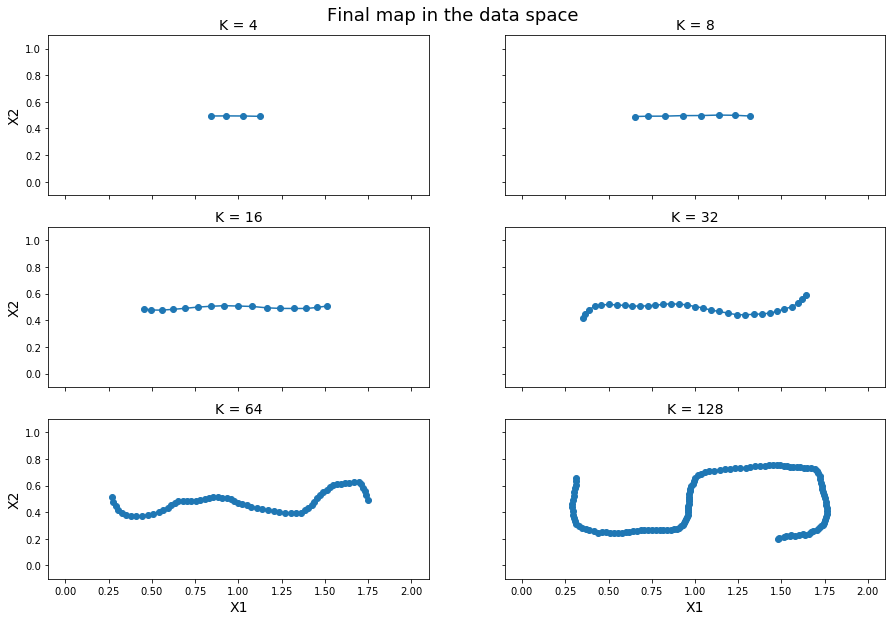

In [88]:
# Plot the protoypes and their connections
fig, ax = plt.subplots(3,2, sharex=True, sharey=True, figsize= (15,10))
ax = ax.ravel()
for i,K in enumerate(Ks):
    #ax[i].scatter(x[:,0],x[:,1],c= 'g',alpha=0.3)
    ax[i].plot(final_ws[i][:,0],final_ws[i][:,1], 'o-')
    ax[i].set_title('K = %i'%(K), size=14)
    ax[i].set_xlim(-0.1,2.1)
    ax[i].set_ylim(-0.1,1.1)
    if i%2 == 0:
        ax[i].set_ylabel("X2", size=14)
ax[4].set_xlabel("X1", size=14)
ax[5].set_xlabel("X1", size=14)
plt.suptitle('Final map in the data space', size=18, y=0.92)
plt.show()

## 10.2.  1d Self-Organizing Maps for 3d data

### a) Visualization of dataset

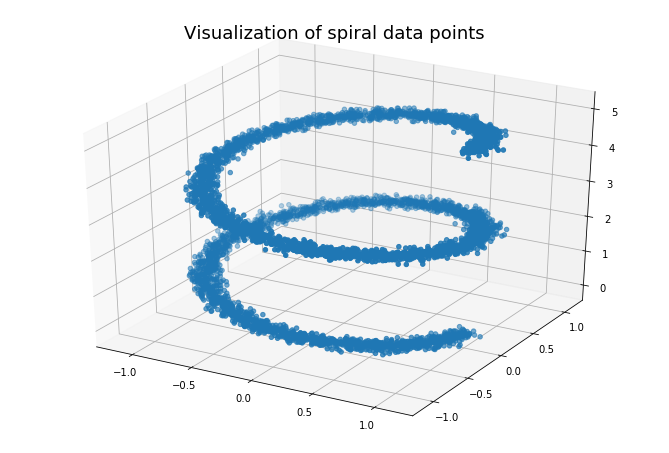

In [90]:
x2 = np.genfromtxt('spiral.csv', delimiter=',',skip_header=1,usecols=(1,2,3))

fig = plt.figure(figsize=(9,6))
ax = Axes3D(fig)
ax.scatter(x2[:,0],x2[:,1], x2[:,2], depthshade=True)
plt.title('Visualization of spiral data points', size=18)
plt.show()

In [91]:
# Permutate values
x2_p = np.random.permutation(x2)

### b) Adapted SOM function

Our function is general enough, thanks to Meng not to Esra.

### c) Implementing 1d self organizing map

In [94]:
Ks = np.array([16,32,64,128])
final_ws, epsilons, sigmas = SOM(x2_p, Ks, init_w2)

###  d) Plotting

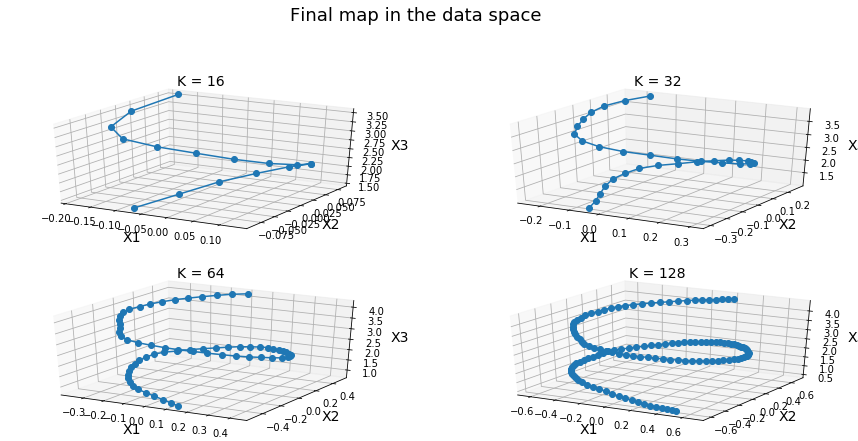

In [95]:
fig = plt.figure(figsize=(15,10))

for i,K in enumerate(Ks):
    ax = fig.add_subplot(3,2,i+1, projection='3d')
    #ax.scatter(x2[:,0],x2[:,1], x2[:,2], depthshade=True)
    ax.plot(final_ws[i][:,0],final_ws[i][:,1],final_ws[i][:,2], 'o-')
    ax.set_title('K = %i'%(K), size=14)
    ax.set_xlabel("X1", size=14)
    ax.set_ylabel("X2", size=14)
    ax.set_zlabel("X3", size=14)
    
plt.suptitle('Final map in the data space', size=18)
plt.show()

## 10.3.  2d Self-Organizing Maps for 3d data

### a) Visualization of dataset

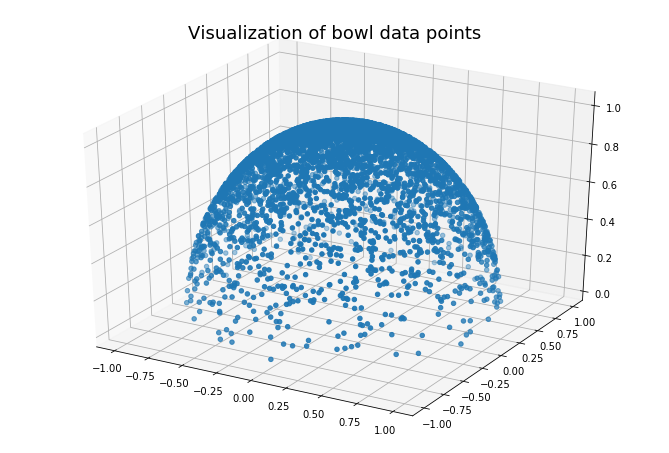

In [98]:
x3 = np.genfromtxt('bowl.csv', delimiter=',',skip_header=1,usecols=(1,2,3))

fig = plt.figure(figsize=(9,6))
ax = Axes3D(fig)
ax.scatter(x3[:,0],x3[:,1], x3[:,2], depthshade=True)
plt.title('Visualization of bowl data points', size=18)
plt.show()

### b) Adapted SOM function

In [108]:
def init_w3(x,Ks):
    w = np.dstack(np.meshgrid(np.arange(K),np.arange(K))).reshape(-1,2)
    return w

In [ ]:
def init_w3(x, Ks):
    #cov = np.cov(x.T)
    #val, vec = np.linalg.eig(cov)
    #mu = x.mean(axis=0)

    w = np.meshgrid(np.arange(K),np.arrange(K)).reshape(-1,2)
    return

In [99]:
def SOM_2D(x, Ks, init_w, epsilon0=0.1, sigma0=1.5):
    dim = x.shape[1]
    t_max = len(x)
    final_ws =[]
    epsilons = np.zeros((t_max+1, len(Ks)))
    sigmas = np.copy(epsilons)
    epsilons[0,:] = epsilon0
    sigmas[0,:] = sigma0*Ks.mean()/np.log(Ks)

    for l,K in enumerate(Ks):
        w = init_w(x, K)

        for t in range(t_max):
            if t <= t_max/4: 
                epsilons[t,l] = epsilons[0,l]
                sigmas[t,l] = sigmas[0,l]
            else: 
                epsilons[t,l] = epsilons[t-1,l] * 0.99
                sigmas[t,l] = sigmas[t-1,l] * 0.99
        #while sigma > 0.1:
            p= np.argmin(euclidean_distances(x[t].reshape(1,dim), w))
            for j in range(K):
                w[j,:] += epsilons[t,l]*np.dot(h_function(p, j, sigmas[t,l]),(x[t]-w[j,:])) 
            #sigma *= 0.95
            #epsilon *= 0.9
        final_ws.append(w)
        
    return final_ws, epsilons, sigmas